# Time Series Prediction

## FEATURE ENGINEERING

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

df = pd.read_csv("data_processed.csv")

# create date index
quarter_to_month = {1: 1, 2: 4, 3: 7, 4: 10}
df['date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['quarter'].map(quarter_to_month).astype(str) + '-01')

df.set_index('date', inplace=True)
df

,Year,quarter,brentcrude,route_id,city1,city2,nsmiles,haul_category,passengers,passenger_proportion_change,fare,fare_proportion_change,carrier_lm,carrier_lm_category,ms_lm,fare_diff_avg_lm,carrier_lf,carrier_lf_category,ms_lf,fare_diff_avg_lf
date,,,,,,,,,,,,,,,,,,,,
2010-01-01,2010,1,76.674837,30135_30977,"Allentown/Bethlehem/Easton, PA","Chicago, IL",654,short,64,-0.168831,270.71,0.130596,UA,full service,0.8300,-7.31,US,full service,0.1100,69.84
2011-01-01,2011,1,105.369424,30135_30977,"Allentown/Bethlehem/Easton, PA","Chicago, IL",654,short,93,0.453125,277.27,0.024233,UA,full service,0.5400,-19.71,AA,full service,0.2800,30.59
2012-01-01,2012,1,118.427965,30135_30977,"Allentown/Bethlehem/Easton, PA","Chicago, IL",654,short,69,-0.258065,338.44,0.220615,UA,full service,0.7800,-3.96,US,full service,0.1800,25.26
2013-01-01,2013,1,112.867180,30135_30977,"Allentown/Bethlehem/Easton, PA","Chicago, IL",654,short,70,0.014493,334.03,-0.013030,UA,full service,0.7400,-13.43,US,full service,0.2100,49.14
2014-01-01,2014,1,108.211017,30135_30977,"Allentown/Bethlehem/Easton, PA","Chicago, IL",654,short,42,-0.400000,270.79,-0.189324,UA,full service,0.4500,-38.68,US,full service,0.3500,48.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-01,2019,4,62.555384,35412_34614,"Knoxville, TN","Salt Lake City, UT",1552,medium,45,0.125000,375.35,-0.024305,DL,full service,0.6058,-43.72,UA,full service,0.1370,52.53
2020-10-01,2020,4,45.344592,35412_34614,"Knoxville, TN","Salt Lake City, UT",1552,medium,37,-0.177778,246.53,-0.343200,DL,full service,0.5029,-39.68,AA,full service,0.2206,23.11
2021-10-01,2021,4,79.811318,35412_34614,"Knoxville, TN","Salt Lake City, UT",1552,medium,45,0.216216,348.57,0.413905,DL,full service,0.5755,-40.24,AA,full service,0.2278,53.82


### dummify year and quarter

In [2]:
year_dummies = pd.get_dummies(df['Year'], prefix='year', drop_first=True)
quarter_dummies = pd.get_dummies(df['quarter'], prefix='quarter', drop_first=True)
df = pd.concat([df, year_dummies, quarter_dummies], axis=1)
df = df.sort_index().sort_values(by='route_id', kind='mergesort')
df

,Year,quarter,brentcrude,route_id,city1,city2,nsmiles,haul_category,passengers,passenger_proportion_change,fare,fare_proportion_change,carrier_lm,carrier_lm_category,ms_lm,fare_diff_avg_lm,carrier_lf,carrier_lf_category,ms_lf,fare_diff_avg_lf,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020,year_2021,year_2022,year_2023,year_2024,quarter_2,quarter_3,quarter_4
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-01-01,2010,1,76.674837,30135_30977,"Allentown/Bethlehem/Easton, PA","Chicago, IL",654,short,64,-0.168831,270.71,0.130596,UA,full service,0.8300,-7.31,US,full service,0.1100,69.84,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2010-04-01,2010,2,78.845036,30135_30977,"Allentown/Bethlehem/Easton, PA","Chicago, IL",654,short,111,0.110000,252.90,0.117494,UA,full service,0.7500,-16.39,US,full service,0.1100,52.02,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2010-07-01,2010,3,76.675000,30135_30977,"Allentown/Bethlehem/Easton, PA","Chicago, IL",654,short,135,0.607143,247.72,-0.049971,UA,full service,0.5600,-25.04,US,full service,0.1100,68.60,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2010-10-01,2010,4,87.033160,30135_30977,"Allentown/Bethlehem/Easton, PA","Chicago, IL",654,short,116,0.657143,267.40,-0.043394,UA,full service,0.6600,-8.95,AA,full service,0.2400,10.65,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2011-01-01,2011,1,105.369424,30135_30977,"Allentown/Bethlehem/Easton, PA","Chicago, IL",654,short,93,0.453125,277.27,0.024233,UA,full service,0.5400,-19.71,AA,full service,0.2800,30.59,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-01,2023,1,82.323613,35412_34614,"Knoxville, TN","Salt Lake City, UT",1552,medium,48,0.170732,446.39,0.143124,DL,full service,0.3442,-95.61,F9,ultra lcc,0.1256,331.58,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
2023-04-01,2023,2,78.086130,35412_34614,"Knoxville, TN","Salt Lake City, UT",1552,medium,62,0.192308,462.45,-0.045117,DL,full service,0.4283,-102.69,AA,full service,0.3593,74.42,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False
2023-07-01,2023,3,85.983547,35412_34614,"Knoxville, TN","Salt Lake City, UT",1552,medium,72,0.358491,403.02,-0.152678,DL,full service,0.4076,-90.42,AA,full service,0.3727,45.05,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False


### dummify cities

In [3]:
unique_cities = pd.Series(pd.concat([df['city1'], df['city2']]).unique())

for city in unique_cities:
    df[f'city_{city}'] = (df['city1'] == city) | (df['city2'] == city)

C:\Users\Arial\AppData\Local\Temp\ipykernel_27076\1534009089.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'city_{city}'] = (df['city1'] == city) | (df['city2'] == city)
C:\Users\Arial\AppData\Local\Temp\ipykernel_27076\1534009089.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'city_{city}'] = (df['city1'] == city) | (df['city2'] == city)
C:\Users\Arial\AppData\Local\Temp\ipykernel_27076\1534009089.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` m

### lagged features

In [4]:
df['lagged1_fare'] = df.groupby('route_id')['fare'].shift(1)
df['lagged4_fare'] = df.groupby('route_id')['fare'].shift(4)
df['lagged1_fare_pctchange'] = df.groupby('route_id')['fare'].pct_change(1).shift(1)
df['lagged4_fare_pctchange'] = df.groupby('route_id')['fare'].pct_change(4).shift(4)

df['lagged1_passenger'] = df.groupby('route_id')['passengers'].shift(1)
df['lagged4_passenger'] = df.groupby('route_id')['passengers'].shift(4)
df['lagged1_passenger_pctchange'] = df.groupby('route_id')['passengers'].pct_change(1).shift(1)
df['lagged4_passenger_pctchange'] = df.groupby('route_id')['passengers'].pct_change(4).shift(4)

df['lagged1_brentcrude'] = df.groupby('route_id')['brentcrude'].shift(1)
df['lagged1_brentcrude_pctchange'] = df.groupby('route_id')['brentcrude'].pct_change(1).shift(1)

df['lagged1_fare_diff_avg_lm'] = df.groupby('route_id')['fare_diff_avg_lm'].shift(1)
df['lagged4_fare_diff_avg_lm'] = df.groupby('route_id')['fare_diff_avg_lm'].shift(4)

df['lagged1_fare_diff_avg_lf'] = df.groupby('route_id')['fare_diff_avg_lf'].shift(1)
df['lagged4_fare_diff_avg_lf'] = df.groupby('route_id')['fare_diff_avg_lf'].shift(4)

df['lagged1_ms_lm'] = df.groupby('route_id')['ms_lm'].shift(1)
df['lagged4_ms_lm'] = df.groupby('route_id')['ms_lm'].shift(4)

df['lagged1_ms_lf'] = df.groupby('route_id')['ms_lf'].shift(1)
df['lagged4_ms_lf'] = df.groupby('route_id')['ms_lf'].shift(4)

C:\Users\Arial\AppData\Local\Temp\ipykernel_27076\4186523963.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['lagged1_fare'] = df.groupby('route_id')['fare'].shift(1)
C:\Users\Arial\AppData\Local\Temp\ipykernel_27076\4186523963.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['lagged4_fare'] = df.groupby('route_id')['fare'].shift(4)
C:\Users\Arial\AppData\Local\Temp\ipykernel_27076\4186523963.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

#### testing lagged features

In [5]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df_sample = df.copy()
df_sample.dropna(inplace=True)

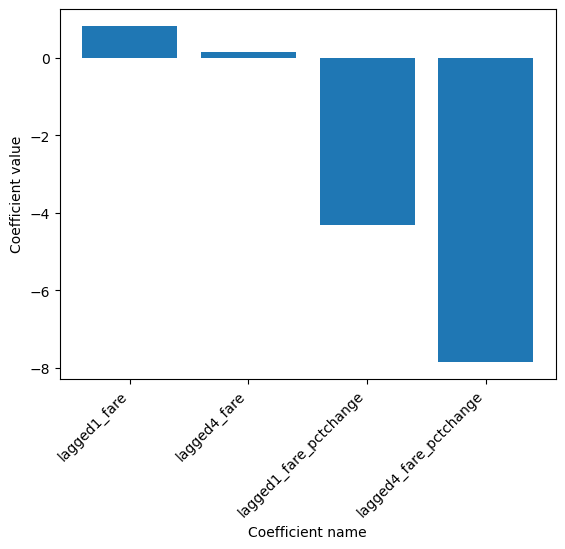

In [6]:
X = df_sample[['lagged1_fare', 'lagged4_fare', 'lagged1_fare_pctchange', 'lagged4_fare_pctchange']]
y = df_sample['fare']

model = LinearRegression()
model.fit(X, y)

fig, ax = plt.subplots()
ax.bar(X.columns, model.coef_)
ax.set(xlabel='Coefficient name', ylabel='Coefficient value')

plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

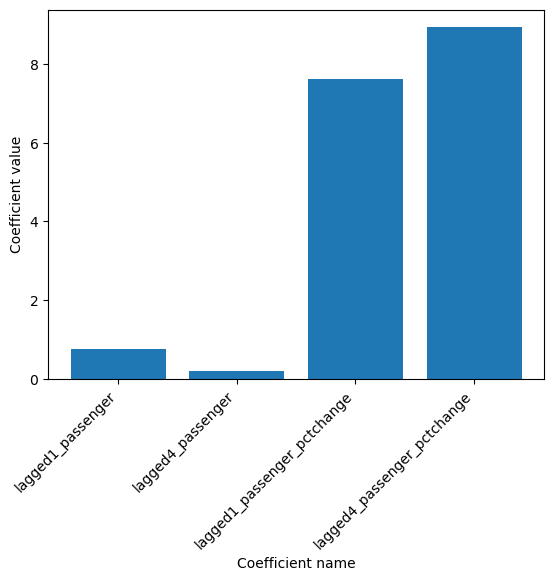

In [7]:
X = df_sample[['lagged1_passenger', 'lagged4_passenger', 'lagged1_passenger_pctchange', 'lagged4_passenger_pctchange']]
y = df_sample['passengers']

model = LinearRegression()
model.fit(X, y)

fig, ax = plt.subplots()
ax.bar(X.columns, model.coef_)
ax.set(xlabel='Coefficient name', ylabel='Coefficient value')

plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

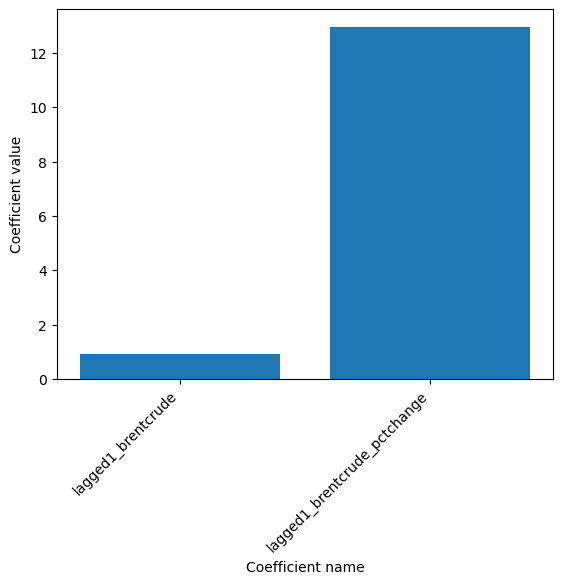

In [8]:
X = df_sample[['lagged1_brentcrude', 'lagged1_brentcrude_pctchange']]
y = df_sample['brentcrude']

model = LinearRegression()
model.fit(X, y)

fig, ax = plt.subplots()
ax.bar(X.columns, model.coef_)
ax.set(xlabel='Coefficient name', ylabel='Coefficient value')

plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

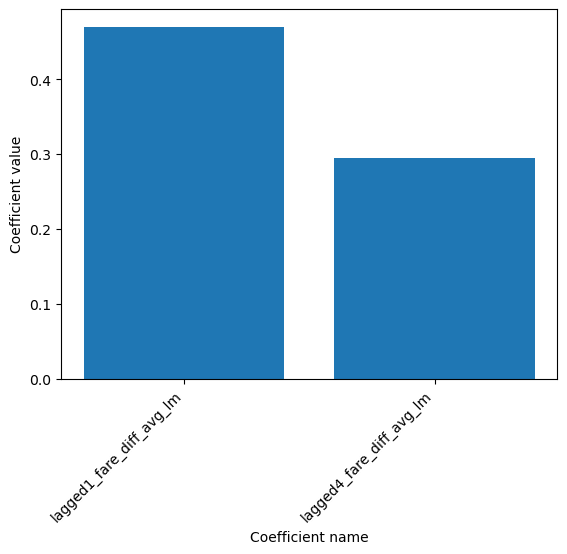

In [9]:
X = df_sample[['lagged1_fare_diff_avg_lm', 'lagged4_fare_diff_avg_lm']]
y = df_sample['fare_diff_avg_lm']

model = LinearRegression()
model.fit(X, y)

fig, ax = plt.subplots()
ax.bar(X.columns, model.coef_)
ax.set(xlabel='Coefficient name', ylabel='Coefficient value')

plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

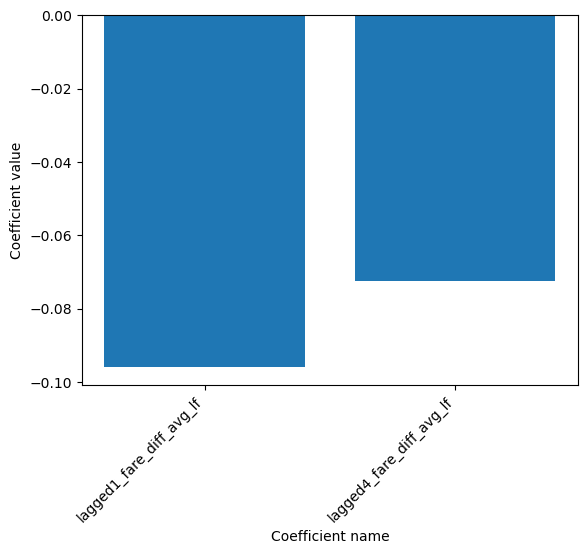

In [10]:
X = df_sample[['lagged1_fare_diff_avg_lf', 'lagged4_fare_diff_avg_lf']]
y = df_sample['fare_diff_avg_lm']

model = LinearRegression()
model.fit(X, y)

fig, ax = plt.subplots()
ax.bar(X.columns, model.coef_)
ax.set(xlabel='Coefficient name', ylabel='Coefficient value')

plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

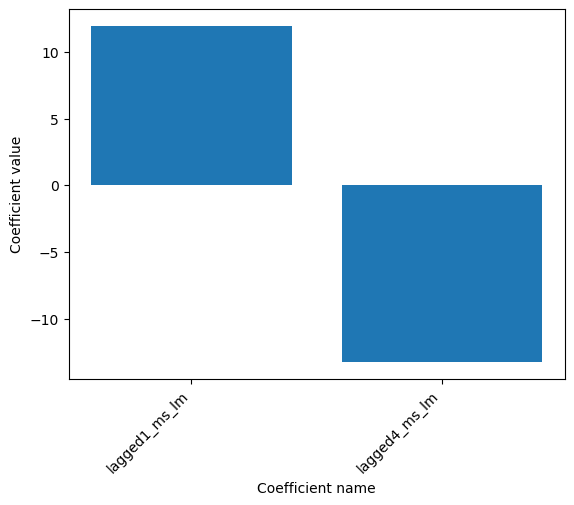

In [11]:
X = df_sample[['lagged1_ms_lm', 'lagged4_ms_lm']]
y = df_sample['fare_diff_avg_lm']

model = LinearRegression()
model.fit(X, y)

fig, ax = plt.subplots()
ax.bar(X.columns, model.coef_)
ax.set(xlabel='Coefficient name', ylabel='Coefficient value')

plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

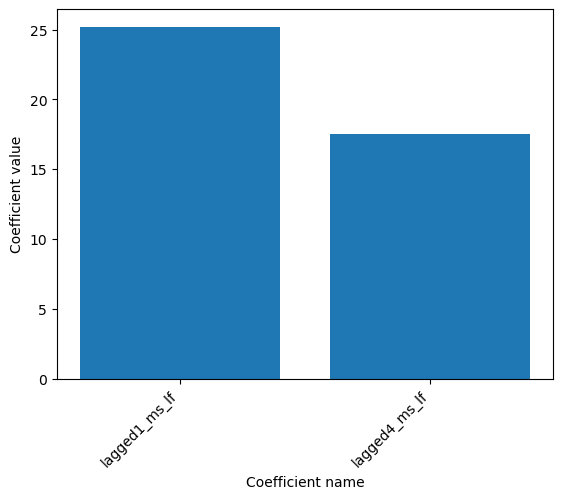

In [12]:
X = df_sample[['lagged1_ms_lf', 'lagged4_ms_lf']]
y = df_sample['fare_diff_avg_lm']

model = LinearRegression()
model.fit(X, y)

fig, ax = plt.subplots()
ax.bar(X.columns, model.coef_)
ax.set(xlabel='Coefficient name', ylabel='Coefficient value')

plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [13]:
df.dropna(inplace=True)
df

,Year,quarter,brentcrude,route_id,city1,city2,nsmiles,haul_category,passengers,passenger_proportion_change,fare,fare_proportion_change,carrier_lm,carrier_lm_category,ms_lm,fare_diff_avg_lm,carrier_lf,carrier_lf_category,ms_lf,fare_diff_avg_lf,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020,year_2021,year_2022,year_2023,year_2024,quarter_2,quarter_3,quarter_4,"city_Allentown/Bethlehem/Easton, PA","city_Albuquerque, NM","city_Eureka/Arcata, CA","city_Atlantic City, NJ","city_Colorado Springs, CO","city_Dallas/Fort Worth, TX","city_Pittsburgh, PA","city_Augusta, GA","city_Huntsville, AL","city_Albany, NY","city_Amarillo, TX","city_Denver, CO","city_Aspen, CO","city_Atlanta, GA (Metropolitan Area)","city_Appleton, WI","city_Austin, TX","city_Asheville, NC","city_Tucson, AZ","city_Phoenix, AZ","city_Shreveport, LA","city_Hartford, CT","city_Seattle, WA","city_Bakersfield, CA","city_Mobile, AL","city_Bangor, ME","city_Birmingham, AL","city_El Paso, TX","city_Billings, MT","city_Bismarck/Mandan, ND","city_Cleveland, OH (Metropolitan Area)","city_Bellingham, WA","city_Bloomington/Normal, IL","city_Nashville, TN","city_Boise, ID","city_Boston, MA (Metropolitan Area)","city_Brownsville, TX","city_Baton Rouge, LA","city_Burlington, VT","city_Buffalo, NY","city_Bozeman, MT","city_Washington, DC (Metropolitan Area)","city_Columbia, SC","city_Chicago, IL","city_Chattanooga, TN","city_Charlottesville, VA","city_Charleston, SC","city_Cedar Rapids/Iowa City, IA","city_Charlotte, NC","city_Columbus, OH","city_St. Louis, MO","city_Myrtle Beach, SC","city_Jacksonville, FL","city_Corpus Christi, TX","city_Daytona Beach, FL","city_Dayton, OH","city_Detroit, MI","city_Des Moines, IA","city_Houston, TX","city_Orlando, FL","city_Panama City, FL","city_Valparaiso, FL","city_Elmira/Corning, NY","city_Eugene, OR","city_Key West, FL","city_Fargo, ND","city_Fresno, CA","city_Fayetteville, NC","city_Kalispell, MT","city_Minneapolis/St. Paul, MN","city_New York City, NY (Metropolitan Area)","city_Fort Myers, FL","city_Flint, MI","city_Sioux Falls, SD","city_Fort Wayne, IN","city_Fayetteville, AR","city_Greenville/Spartanburg, SC","city_Spokane, WA","city_Great Falls, MT","city_Grand Junction, CO","city_Gainesville, FL","city_Gulfport/Biloxi, MS","city_Killeen, TX","city_Grand Rapids, MI","city_Greensboro/High Point, NC","city_Harrisburg, PA","city_Harlingen/San Benito, TX","city_Las Vegas, NV","city_Ashland, WV","city_Indianapolis, IN","city_Jackson, WY","city_Jackson/Vicksburg, MS","city_San Francisco, CA (Metropolitan Area)","city_Miami, FL (Metropolitan Area)","city_Los Angeles, CA (Metropolitan Area)","city_Little Rock, AR","city_Lubbock, TX","city_Lexington, KY","city_Lafayette, LA","city_Louisville, KY","city_Cincinnati, OH","city_Midland/Odessa, TX","city_Sacramento, CA","city_Tampa, FL (Metropolitan Area)","city_Kansas City, MO","city_San Antonio, TX","city_Memphis, TN","city_Medford, OR","city_Omaha, NE","city_Milwaukee, WI","city_Quad Cities, IL (Metropolitan Area)","city_Madison, WI","city_Missoula, MT","city_New Orleans, LA","city_San Diego, CA","city_Norfolk, VA (Metropolitan Area)","city_Pensacola, FL","city_Jacksonville/Camp Lejeune, NC","city_Oklahoma City, OK","city_Portland, OR","city_Philadelphia, PA","city_Peoria, IL","city_Paso Robles/San Luis Obispo, CA","city_Pasco/Kennewick/Richland, WA","city_Palm Springs, CA","city_Portland, ME","city_Santa Rosa, CA","city_Rapid City, SD","city_Bend/Redmond, OR","city_Raleigh/Durham, NC","city_Rockford, IL","city_Richmond, VA","city_Reno, NV","city_Roanoke, VA","city_Rochester, NY","city_Salt Lake City, UT","city_Tulsa, OK","city_Savannah, GA","city_Santa Barbara, CA","city_South Bend, IN","city_Sanford, FL","city_Springfield, MO","city_Sarasota/Bradenton, FL","city_Syracuse, NY","city_Tallahassee, FL","city_Bristol/Johnson City/Kingsport, TN","city_Knoxville, TN","city_Durango, CO","city_Scranton/Wilkes-Barre, PA","city_Wichita, KS","city_Evansvil

## FEATURE SELECTION

In [14]:
y = df['fare']

# These are features that MUST be dropped
X = df.drop(['fare', 'brentcrude', 'passengers', 'ms_lm', 'fare_diff_avg_lm', 'ms_lf', 'fare_diff_avg_lf', 
             'Year', 'quarter', 'route_id', 'city1', 'city2', 'fare_proportion_change', 'passenger_proportion_change', 'carrier_lm', 'carrier_lf'], axis=1)

# Based on the tests above, drop potential irrelevant lagged features (can be adjusted)
X.drop(['lagged1_fare', 'lagged4_fare', 'lagged1_passenger', 'lagged4_passenger', 'lagged1_brentcrude',
        'lagged1_fare_diff_avg_lm', 'lagged1_ms_lm', 'lagged4_ms_lf'], axis=1, inplace=True)

X = pd.get_dummies(X, drop_first=True)
X.head(5)

,nsmiles,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020,year_2021,year_2022,year_2023,year_2024,quarter_2,quarter_3,quarter_4,"city_Allentown/Bethlehem/Easton, PA","city_Albuquerque, NM","city_Eureka/Arcata, CA","city_Atlantic City, NJ","city_Colorado Springs, CO","city_Dallas/Fort Worth, TX","city_Pittsburgh, PA","city_Augusta, GA","city_Huntsville, AL","city_Albany, NY","city_Amarillo, TX","city_Denver, CO","city_Aspen, CO","city_Atlanta, GA (Metropolitan Area)","city_Appleton, WI","city_Austin, TX","city_Asheville, NC","city_Tucson, AZ","city_Phoenix, AZ","city_Shreveport, LA","city_Hartford, CT","city_Seattle, WA","city_Bakersfield, CA","city_Mobile, AL","city_Bangor, ME","city_Birmingham, AL","city_El Paso, TX","city_Billings, MT","city_Bismarck/Mandan, ND","city_Cleveland, OH (Metropolitan Area)","city_Bellingham, WA","city_Bloomington/Normal, IL","city_Nashville, TN","city_Boise, ID","city_Boston, MA (Metropolitan Area)","city_Brownsville, TX","city_Baton Rouge, LA","city_Burlington, VT","city_Buffalo, NY","city_Bozeman, MT","city_Washington, DC (Metropolitan Area)","city_Columbia, SC","city_Chicago, IL","city_Chattanooga, TN","city_Charlottesville, VA","city_Charleston, SC","city_Cedar Rapids/Iowa City, IA","city_Charlotte, NC","city_Columbus, OH","city_St. Louis, MO","city_Myrtle Beach, SC","city_Jacksonville, FL","city_Corpus Christi, TX","city_Daytona Beach, FL","city_Dayton, OH","city_Detroit, MI","city_Des Moines, IA","city_Houston, TX","city_Orlando, FL","city_Panama City, FL","city_Valparaiso, FL","city_Elmira/Corning, NY","city_Eugene, OR","city_Key West, FL","city_Fargo, ND","city_Fresno, CA","city_Fayetteville, NC","city_Kalispell, MT","city_Minneapolis/St. Paul, MN","city_New York City, NY (Metropolitan Area)","city_Fort Myers, FL","city_Flint, MI","city_Sioux Falls, SD","city_Fort Wayne, IN","city_Fayetteville, AR","city_Greenville/Spartanburg, SC","city_Spokane, WA","city_Great Falls, MT","city_Grand Junction, CO","city_Gainesville, FL","city_Gulfport/Biloxi, MS","city_Killeen, TX","city_Grand Rapids, MI","city_Greensboro/High Point, NC","city_Harrisburg, PA","city_Harlingen/San Benito, TX","city_Las Vegas, NV","city_Ashland, WV","city_Indianapolis, IN","city_Jackson, WY","city_Jackson/Vicksburg, MS","city_San Francisco, CA (Metropolitan Area)","city_Miami, FL (Metropolitan Area)","city_Los Angeles, CA (Metropolitan Area)","city_Little Rock, AR","city_Lubbock, TX","city_Lexington, KY","city_Lafayette, LA","city_Louisville, KY","city_Cincinnati, OH","city_Midland/Odessa, TX","city_Sacramento, CA","city_Tampa, FL (Metropolitan Area)","city_Kansas City, MO","city_San Antonio, TX","city_Memphis, TN","city_Medford, OR","city_Omaha, NE","city_Milwaukee, WI","city_Quad Cities, IL (Metropolitan Area)","city_Madison, WI","city_Missoula, MT","city_New Orleans, LA","city_San Diego, CA","city_Norfolk, VA (Metropolitan Area)","city_Pensacola, FL","city_Jacksonville/Camp Lejeune, NC","city_Oklahoma City, OK","city_Portland, OR","city_Philadelphia, PA","city_Peoria, IL","city_Paso Robles/San Luis Obispo, CA","city_Pasco/Kennewick/Richland, WA","city_Palm Springs, CA","city_Portland, ME","city_Santa Rosa, CA","city_Rapid City, SD","city_Bend/Redmond, OR","city_Raleigh/Durham, NC","city_Rockford, IL","city_Richmond, VA","city_Reno, NV","city_Roanoke, VA","city_Rochester, NY","city_Salt Lake City, UT","city_Tulsa, OK","city_Savannah, GA","city_Santa Barbara, CA","city_South Bend, IN","city_Sanford, FL","city_Springfield, MO","city_Sarasota/Bradenton, FL","city_Syracuse, NY","city_Tallahassee, FL","city_Bristol/Johnson City/Kingsport, TN","city_Knoxville, TN","city_Durango, CO","city_Scranton/Wilkes-Barre, PA","city_Wichita, KS","city_Evansville, IN","city_Wilmington, NC","city_Mission/McAllen/Edinburg, TX","city_West Palm Beach/Palm Beach, FL","city_Salinas/Monterey, CA","city_Idaho Falls, ID","city_Melbourne, FL","city_Traverse City, MI","city_Stockton, CA","city_Toledo,

### checking colinearity

In [15]:
from statsmodels.tools.tools import add_constant

bool_columns = X.select_dtypes(include='bool').columns
X1 = X.loc[:, ~X.columns.isin(bool_columns)]

X1 = add_constant(X1)
boolean_columns = X1.select_dtypes(include='bool').columns
X1[boolean_columns] = X1[boolean_columns].astype(int)

vif_data = pd.DataFrame()
vif_data["feature"] = X1.columns

from statsmodels.stats.outliers_influence import variance_inflation_factor

for i in range(len(X1.columns)):
    vif_data.loc[vif_data.index[i], "VIF"] = variance_inflation_factor(X1.values, i)

vif_data

,feature,VIF
0,const,25.828344
1,nsmiles,1.255768
2,lagged1_fare_pctchange,1.033205
3,lagged4_fare_pctchange,1.064117
4,lagged1_passenger_pctchange,1.155578
5,lagged4_passenger_pctchange,1.050122
6,lagged1_brentcrude_pctchange,1.208700
7,lagged4_fare_diff_avg_lm,1.111595
8,lagged1_fare_diff_avg_lf,1.717979
9,lagged4_fare_diff_avg_lf,1.513210


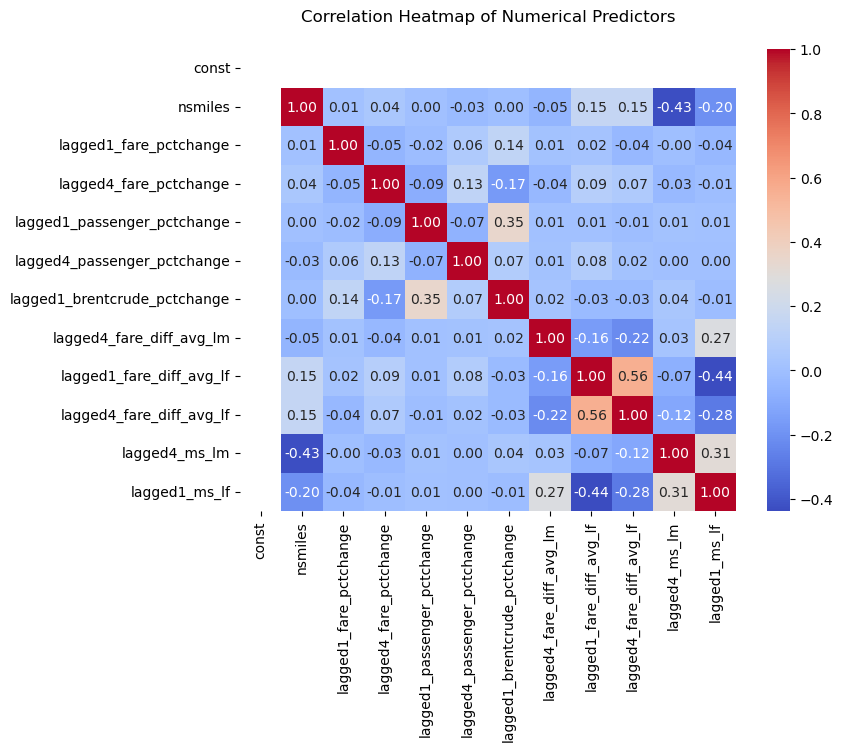

In [16]:
import seaborn as sns

correlation_matrix = X1.corr()

plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Predictors', pad=20)
plt.show()

## Model